In [10]:
import numpy as np
#tạo các ma trận với giá trị ngẫu nhiên
mat1 = np.random.rand(3,3)
print("ma trận 1 \n", mat1)
mat2 = np.random.rand(3,3)
print("ma trận 2 \n",mat2)
print("Tổng ma trận 1 và 2\n",mat1 + mat2)

ma trận 1 
 [[0.24123166 0.59149665 0.07134898]
 [0.32452813 0.21845199 0.07758001]
 [0.04857175 0.50737679 0.9013665 ]]
ma trận 2 
 [[0.32182935 0.3958567  0.41845779]
 [0.64631573 0.32504314 0.15308183]
 [0.65187196 0.62240544 0.76484406]]
Tổng ma trận 1 và 2
 [[0.56306101 0.98735335 0.48980676]
 [0.97084386 0.54349512 0.23066184]
 [0.70044371 1.12978223 1.66621056]]


In [11]:
import pandas as pd

pd.read_csv("raw_pah_data.csv")

,Unnamed: 0,No,BG,IP,EA,smiles
0,0,P4.1,4.837,6.134,1.297,c12c3ccccc3c4ccccc4c1cccc2
1,1,P4.2,4.168,5.812,1.644,c1(c(ccc2c1cccc2)cc3)c4c3cccc4
2,2,P4.3,4.207,5.799,1.592,c1(ccccc1cc2)c3c2c4ccccc4cc3
3,3,P4.4,3.720,5.599,1.879,c1(ccccc1cc2cc3)cc2c4c3cccc4
4,4,P4.5,2.747,5.131,2.384,c12cc3cc4ccccc4cc3cc1cccc2
...,...,...,...,...,...,...
243,243,T8.12,3.213,5.327,2.114,s1ccc2cc3cc4c5ccccc5c5c6ccc7ccsc7c6ccc5c4cc3cc12
244,244,T8.13,2.681,5.078,2.397,s1ccc2c1cc1cc3cc4c(ccc5cc6cc7c(scc7)cc6cc45)cc...
245,245,T8.14,1.883,4.732,2.849,s1ccc2c3cc4cc5cc6cc7ccc8c(ccs8)c7cc6cc5cc4cc3c...
246,246,T8.15,2.947,5.250,2.303,s1ccc2c1ccc1c2c2c(c3c(scc3)cc2)c2c1cc1cc3ccccc...


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

model.fit(X,y)

print("hệ số góc của mô hình", model.coef_)
print("intercept của mô hình", model.intercept_)

hệ số góc của mô hình [1. 2.]
intercept của mô hình 3.0000000000000018


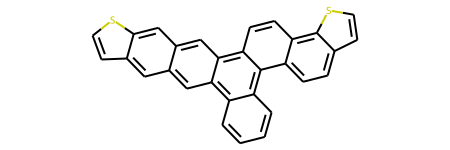

In [21]:
import rdkit
import rdkit.Chem as Chem

mol = Chem.MolFromSmiles("s1ccc2cc3cc4c5ccccc5c5c6ccc7ccsc7c6ccc5c4cc3cc12")
mol

In [28]:
import rdkit.Chem.AllChem as AllChem

ecfp = AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits = 26)
ecfp = list(ecfp)
ecfp

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

In [44]:
mol = Chem.MolFromSmiles("s1ccc2cc3cc4c5ccccc5c5c6ccc7ccsc7c6ccc5c4cc3cc12")

nodes = []
for atom in mol.GetAtoms():
    nodes.append(atom.GetAtomicNum())

print(nodes)

[16, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 16, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


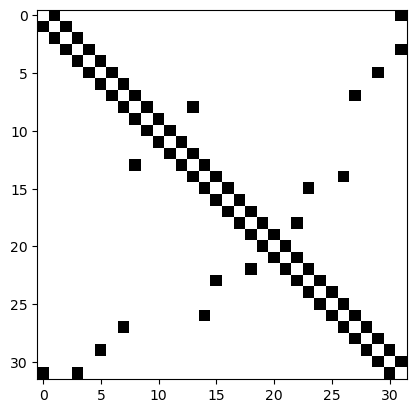

In [45]:
adj_mat = np.zeros((len(nodes),len(nodes)))
for bond in mol.GetBonds():
    i = bond.GetBeginAtomIdx()
    j = bond.GetEndAtomIdx()
    adj_mat[i][j] = 1
    adj_mat[j][i] = 1

import matplotlib.pyplot as plt
plt.imshow(adj_mat,cmap = "Greys")

In [3]:
from collections import Counter
from rdkit import Chem
from rdkit.Chem import AllChem

def smiles2atom_bond_count(smiles):
    if isinstance(smiles,list):
        _list = []
        for s in smiles:
            _list.append(smiles2atom_bond_count(s))
        return np.array(_list)
    else:
        mol = Chem.MolFromSmiles(smiles)

        nodes = []
        for atom in mol.GetAtoms():
            nodes.append(atom.GetAtomicNum())
        counter = Counter(nodes)

        cc_bond = 0; cs_bond = 0
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            if 16 in [nodes[i],nodes[j]]:
                cs_bond += 1
            else:
                cc_bond += 1

        return [counter[6],counter[16],cc_bond,cs_bond]

smiles2atom_bond_count("s1ccc2cc3cc4c5ccccc5c5c6ccc7ccsc7c6ccc5c4cc3cc12")

[30, 2, 35, 4]